In [131]:
import matplotlib.pyplot as plt
import torch
def int_exp_shift( x_int, scaling_factor):
    _n = 16
    
    x_int = x_int + (x_int / 2).floor() - (x_int / 2**4).floor()

    with torch.no_grad():
        x0_int = torch.floor(-1.0 / scaling_factor)
    x_int = torch.max(x_int, _n * x0_int)

    q = (x_int / x0_int).floor()
    r = x_int - x0_int * q
    exp_int = r / 2 - x0_int
    exp_int = torch.clamp((exp_int * 2 ** (_n - q)).floor(), min=0)
    scaling_factor = scaling_factor / 2**_n
    return exp_int, scaling_factor

In [132]:
x_fp = torch.randn(10000)

s_x = x_fp.abs().max() / 127
x_int = (x_fp / s_x).round()


exp_int, scaling_factor = int_exp_shift(x_int, s_x)

In [133]:
print(x_fp.min(), x_fp.max())
print(exp_int.min(), exp_int.max())
exp_hat = exp_int * scaling_factor

exp_fp = torch.exp(x_fp)
print(exp_fp.min(), exp_fp.max())
print(exp_hat.min(), exp_hat.max())

tensor(-4.4362) tensor(3.9776)
tensor(25088.) tensor(1.0066e+08)
tensor(0.0118) tensor(53.3888)
tensor(0.0134) tensor(53.6537)


In [134]:
print(torch.norm(exp_fp - exp_hat) )

tensor(10.1600)


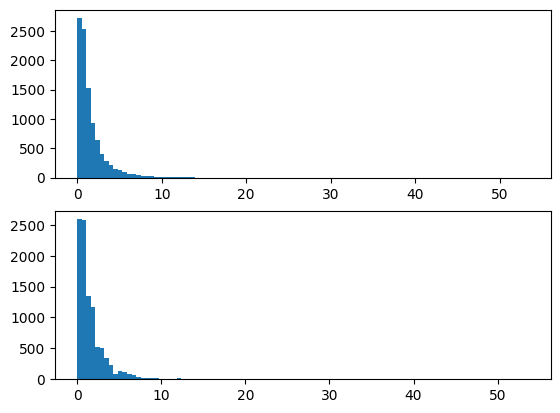

In [135]:
fig, ax = plt.subplots(2, 1)
ax[0].hist(exp_fp.numpy(), bins=100)
ax[1].hist(exp_hat.numpy(), bins=100)
plt.show()

In [155]:
import matplotlib.pyplot as plt
import torch


def bits_required(x_int):
    # 절대값을 취하고 이진수 변환 후, 부호 비트 포함해서 비트 수 계산
    x_int = int(x_int.item())  # 텐서에서 파이썬 정수로 변환
    if x_int == 0:
        return 1  # 0은 1비트로 표현 가능
    return (
        len(bin(abs(x_int))) - 2 + 1
    )  # bin()은 '0b'로 시작하기 때문에 -2, 부호 비트 포함


def int_exp_shift(x_int, scaling_factor):
    _n = 10
    print(x_int)
    x_int = x_int + (x_int / 2).floor() - (x_int / 2**4).floor()
    print(x_int)
    with torch.no_grad():
        x0_int = torch.floor(-1.0 / scaling_factor)
        print(x0_int)
    x_int = torch.max(x_int, _n * x0_int)

    q = (x_int / x0_int).floor()
    r = x_int - x0_int * q
    print("q, r", q, r)
    exp_int = r / 2 - x0_int
    print(exp_int, bits_required(exp_int))
    exp_int = torch.clamp((exp_int * 2 ** (_n - q)).floor(), min=0)
    scaling_factor = scaling_factor / 2**_n
    return exp_int, scaling_factor

# x_fp = 1
# s_x = 1/127
dja = torch.tensor(1)
print(torch.exp(dja))
wns = torch.tensor(1/127)
dja, wns = int_exp_shift(dja, wns)
print(dja*wns)
print(dja, wns)

tensor(2.7183)
tensor(1)
tensor(1.)
tensor(-127.)
q, r tensor(-1.) tensor(-126.)
tensor(64.) 8
tensor(1.0079)
tensor(131072.) tensor(7.6895e-06)


In [137]:
1.4375/127

0.011318897637795276

In [144]:
torch.exp(torch.tensor(1/127))

tensor(1.0079)